# 10 Minutes to "pandas" Module

http://pandas.pydata.org/pandas-docs/stable/10min.html

## Load Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.602886,-0.009738,0.920296,-0.120781
2013-01-02,-0.767066,0.863360,-0.129797,-1.655755
2013-01-03,-0.722352,0.532876,-0.844975,-0.373513
2013-01-04,0.053622,-0.477888,-0.051455,1.668770
2013-01-05,0.433571,0.933637,0.656147,0.117302
2013-01-06,2.105373,-0.806524,1.552399,-0.900801


In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3, 1, 2, 6],dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

print(df2)
print(df2.index)
print(df2.dtypes)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  1  train  foo
2  1.0 2013-01-02  1.0  2   test  foo
3  1.0 2013-01-02  1.0  6  train  foo
Int64Index([0, 1, 2, 3], dtype='int64')
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


## View Data

Head, tail, index, columns, values, describe, info, sorting

In [6]:
print(df.head)
print(df.tail(2))
      

<bound method DataFrame.head of                    A         B         C         D
2013-01-01 -0.602886 -0.009738  0.920296 -0.120781
2013-01-02 -0.767066  0.863360 -0.129797 -1.655755
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
2013-01-04  0.053622 -0.477888 -0.051455  1.668770
2013-01-05  0.433571  0.933637  0.656147  0.117302
2013-01-06  2.105373 -0.806524  1.552399 -0.900801>
                   A         B         C         D
2013-01-05  0.433571  0.933637  0.656147  0.117302
2013-01-06  2.105373 -0.806524  1.552399 -0.900801


In [7]:
print(df.index)
print(df.columns)
print(df.values)
print(type(df.values))

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index([u'A', u'B', u'C', u'D'], dtype='object')
[[-0.60288602 -0.00973814  0.92029578 -0.12078132]
 [-0.76706576  0.86335976 -0.12979687 -1.65575485]
 [-0.72235221  0.53287643 -0.84497539 -0.37351259]
 [ 0.05362211 -0.47788758 -0.05145543  1.66877046]
 [ 0.43357058  0.93363663  0.65614672  0.11730182]
 [ 2.10537251 -0.80652382  1.55239868 -0.90080122]]
<type 'numpy.ndarray'>


In [8]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.083377,0.172621,0.350436,-0.210796
std,1.100490,0.721275,0.858378,1.117051
min,-0.767066,-0.806524,-0.844975,-1.655755
25%,-0.692486,-0.360850,-0.110212,-0.768979
50%,-0.274632,0.261569,0.302346,-0.247147
75%,0.338583,0.780739,0.854259,0.057781
max,2.105373,0.933637,1.552399,1.668770


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [10]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.602886,-0.767066,-0.722352,0.053622,0.433571,2.105373
B,-0.009738,0.863360,0.532876,-0.477888,0.933637,-0.806524
C,0.920296,-0.129797,-0.844975,-0.051455,0.656147,1.552399
D,-0.120781,-1.655755,-0.373513,1.668770,0.117302,-0.900801


In [11]:
print df
print df.sort_index(axis=1, ascending=False)  # re-sort by columnn
print df.sort_index(axis=0, ascending=False)  # re-sort by row

                   A         B         C         D
2013-01-01 -0.602886 -0.009738  0.920296 -0.120781
2013-01-02 -0.767066  0.863360 -0.129797 -1.655755
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
2013-01-04  0.053622 -0.477888 -0.051455  1.668770
2013-01-05  0.433571  0.933637  0.656147  0.117302
2013-01-06  2.105373 -0.806524  1.552399 -0.900801
                   D         C         B         A
2013-01-01 -0.120781  0.920296 -0.009738 -0.602886
2013-01-02 -1.655755 -0.129797  0.863360 -0.767066
2013-01-03 -0.373513 -0.844975  0.532876 -0.722352
2013-01-04  1.668770 -0.051455 -0.477888  0.053622
2013-01-05  0.117302  0.656147  0.933637  0.433571
2013-01-06 -0.900801  1.552399 -0.806524  2.105373
                   A         B         C         D
2013-01-06  2.105373 -0.806524  1.552399 -0.900801
2013-01-05  0.433571  0.933637  0.656147  0.117302
2013-01-04  0.053622 -0.477888 -0.051455  1.668770
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
2013-01-02 -0.767066  0.863360 

In [12]:
print df
print df.sort_values(by='B')

                   A         B         C         D
2013-01-01 -0.602886 -0.009738  0.920296 -0.120781
2013-01-02 -0.767066  0.863360 -0.129797 -1.655755
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
2013-01-04  0.053622 -0.477888 -0.051455  1.668770
2013-01-05  0.433571  0.933637  0.656147  0.117302
2013-01-06  2.105373 -0.806524  1.552399 -0.900801
                   A         B         C         D
2013-01-06  2.105373 -0.806524  1.552399 -0.900801
2013-01-04  0.053622 -0.477888 -0.051455  1.668770
2013-01-01 -0.602886 -0.009738  0.920296 -0.120781
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
2013-01-02 -0.767066  0.863360 -0.129797 -1.655755
2013-01-05  0.433571  0.933637  0.656147  0.117302


## Selection

In [13]:
print(df)

                   A         B         C         D
2013-01-01 -0.602886 -0.009738  0.920296 -0.120781
2013-01-02 -0.767066  0.863360 -0.129797 -1.655755
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
2013-01-04  0.053622 -0.477888 -0.051455  1.668770
2013-01-05  0.433571  0.933637  0.656147  0.117302
2013-01-06  2.105373 -0.806524  1.552399 -0.900801


In [14]:
# Selecting a single column, which yields a Series, equivalent to df.A
print(df['A'])
print(df.A)

2013-01-01   -0.602886
2013-01-02   -0.767066
2013-01-03   -0.722352
2013-01-04    0.053622
2013-01-05    0.433571
2013-01-06    2.105373
Freq: D, Name: A, dtype: float64
2013-01-01   -0.602886
2013-01-02   -0.767066
2013-01-03   -0.722352
2013-01-04    0.053622
2013-01-05    0.433571
2013-01-06    2.105373
Freq: D, Name: A, dtype: float64


In [15]:
# Selecting via [], which slices the rows.
print(df[0:3])
print(df['20130102':'20130104'])

                   A         B         C         D
2013-01-01 -0.602886 -0.009738  0.920296 -0.120781
2013-01-02 -0.767066  0.863360 -0.129797 -1.655755
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
                   A         B         C         D
2013-01-02 -0.767066  0.863360 -0.129797 -1.655755
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
2013-01-04  0.053622 -0.477888 -0.051455  1.668770


In [16]:
# For getting a cross section using a label
print(df)
print(df.loc[dates[0]])  # select by row

                   A         B         C         D
2013-01-01 -0.602886 -0.009738  0.920296 -0.120781
2013-01-02 -0.767066  0.863360 -0.129797 -1.655755
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
2013-01-04  0.053622 -0.477888 -0.051455  1.668770
2013-01-05  0.433571  0.933637  0.656147  0.117302
2013-01-06  2.105373 -0.806524  1.552399 -0.900801
A   -0.602886
B   -0.009738
C    0.920296
D   -0.120781
Name: 2013-01-01 00:00:00, dtype: float64


In [17]:
# Selecting on a multi-axis by label
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.602886,-0.009738
2013-01-02,-0.767066,0.863360
2013-01-03,-0.722352,0.532876
2013-01-04,0.053622,-0.477888
2013-01-05,0.433571,0.933637
2013-01-06,2.105373,-0.806524


In [18]:
# Showing label slicing, both endpoints are included
print(df.loc['20130102':'20130104',['A','B']])

                   A         B
2013-01-02 -0.767066  0.863360
2013-01-03 -0.722352  0.532876
2013-01-04  0.053622 -0.477888


In [19]:
# Reduction in the dimensions of the returned object
df.loc['20130102',['A','B']]

A   -0.767066
B    0.863360
Name: 2013-01-02 00:00:00, dtype: float64

In [20]:
# For getting a scalar value
print(df.loc['20130102', "A"])
print(type(df.loc['20130102', "A"]))

# what method result in a Series?
print(df.loc['20130102', ["A"]])
print(type(df.loc['20130102', ["A"]]))

-0.767065761916
<type 'numpy.float64'>
A   -0.767066
Name: 2013-01-02 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>


In [21]:
# For getting fast access to a scalar (equiv to the prior method)
print(df.at[dates[0],'A'])
print type(dates[0])
print df.index

-0.602886017067
<class 'pandas.tslib.Timestamp'>
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [22]:
# Select by position
print df

# select via the position of the passed integers
print df.iloc[3]

                   A         B         C         D
2013-01-01 -0.602886 -0.009738  0.920296 -0.120781
2013-01-02 -0.767066  0.863360 -0.129797 -1.655755
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
2013-01-04  0.053622 -0.477888 -0.051455  1.668770
2013-01-05  0.433571  0.933637  0.656147  0.117302
2013-01-06  2.105373 -0.806524  1.552399 -0.900801
A    0.053622
B   -0.477888
C   -0.051455
D    1.668770
Name: 2013-01-04 00:00:00, dtype: float64


In [23]:
# By integer slices, acting similar to numpy/python
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.053622,-0.477888
2013-01-05,0.433571,0.933637


In [24]:
# By lists of integer position locations, similar to the numpy/python style
print df
df.iloc[[1,2,4], [0,2]]

                   A         B         C         D
2013-01-01 -0.602886 -0.009738  0.920296 -0.120781
2013-01-02 -0.767066  0.863360 -0.129797 -1.655755
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
2013-01-04  0.053622 -0.477888 -0.051455  1.668770
2013-01-05  0.433571  0.933637  0.656147  0.117302
2013-01-06  2.105373 -0.806524  1.552399 -0.900801


,A,C
2013-01-02,-0.767066,-0.129797
2013-01-03,-0.722352,-0.844975
2013-01-05,0.433571,0.656147


In [25]:
# For slicing rows explicitly
print df
df.iloc[1:3, :]

                   A         B         C         D
2013-01-01 -0.602886 -0.009738  0.920296 -0.120781
2013-01-02 -0.767066  0.863360 -0.129797 -1.655755
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
2013-01-04  0.053622 -0.477888 -0.051455  1.668770
2013-01-05  0.433571  0.933637  0.656147  0.117302
2013-01-06  2.105373 -0.806524  1.552399 -0.900801


,A,B,C,D
2013-01-02,-0.767066,0.863360,-0.129797,-1.655755
2013-01-03,-0.722352,0.532876,-0.844975,-0.373513


In [26]:
# For slicing columns explicitly
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.009738,0.920296
2013-01-02,0.863360,-0.129797
2013-01-03,0.532876,-0.844975
2013-01-04,-0.477888,-0.051455
2013-01-05,0.933637,0.656147
2013-01-06,-0.806524,1.552399


In [27]:
# for getting a value explicitly
df.iloc[1,1]

0.86335975935730247

In [28]:
# for getting fast access to a scalar (equivalent to the prior method)
df.iat[1,1]

0.86335975935730247

In [29]:
df.loc[dates[1:3], ["A", "C"]]

,A,C
2013-01-02,-0.767066,-0.129797
2013-01-03,-0.722352,-0.844975


In [30]:
# Boolean Indexing
print df
df[df.B>0]

                   A         B         C         D
2013-01-01 -0.602886 -0.009738  0.920296 -0.120781
2013-01-02 -0.767066  0.863360 -0.129797 -1.655755
2013-01-03 -0.722352  0.532876 -0.844975 -0.373513
2013-01-04  0.053622 -0.477888 -0.051455  1.668770
2013-01-05  0.433571  0.933637  0.656147  0.117302
2013-01-06  2.105373 -0.806524  1.552399 -0.900801


,A,B,C,D
2013-01-02,-0.767066,0.863360,-0.129797,-1.655755
2013-01-03,-0.722352,0.532876,-0.844975,-0.373513
2013-01-05,0.433571,0.933637,0.656147,0.117302


In [31]:
# A where operation for getting
df[df>0]

,A,B,C,D
2013-01-01,NaN,NaN,0.920296,NaN
2013-01-02,NaN,0.863360,NaN,NaN
2013-01-03,NaN,0.532876,NaN,NaN
2013-01-04,0.053622,NaN,NaN,1.668770
2013-01-05,0.433571,0.933637,0.656147,0.117302
2013-01-06,2.105373,NaN,1.552399,NaN


In [32]:
# use where operation to update values
df[df < 0] = 100
df

,A,B,C,D
2013-01-01,100.000000,100.000000,0.920296,100.000000
2013-01-02,100.000000,0.863360,100.000000,100.000000
2013-01-03,100.000000,0.532876,100.000000,100.000000
2013-01-04,0.053622,100.000000,100.000000,1.668770
2013-01-05,0.433571,0.933637,0.656147,0.117302
2013-01-06,2.105373,100.000000,1.552399,100.000000


In [33]:
df2 = df.copy()  
# NOTE: similar to list, if we simply use "df2 = df", any change happened to either one will affect another one.

In [34]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,100.000000,100.000000,0.920296,100.000000,one
2013-01-02,100.000000,0.863360,100.000000,100.000000,one
2013-01-03,100.000000,0.532876,100.000000,100.000000,two
2013-01-04,0.053622,100.000000,100.000000,1.668770,three
2013-01-05,0.433571,0.933637,0.656147,0.117302,four
2013-01-06,2.105373,100.000000,1.552399,100.000000,three


In [35]:
# Use isin() method for filtering
df2[df2["E"].isin(["two", "three"])]

,A,B,C,D,E
2013-01-03,100.000000,0.532876,100.000000,100.00000,two
2013-01-04,0.053622,100.000000,100.000000,1.66877,three
2013-01-06,2.105373,100.000000,1.552399,100.00000,three


In [36]:
# Setting a new column automatially aligns the data by the indexes
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range("20130102", periods=6))
print(s1)

df["F"] = s1
print(df)

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64
                     A           B           C           D    F
2013-01-01  100.000000  100.000000    0.920296  100.000000  NaN
2013-01-02  100.000000    0.863360  100.000000  100.000000  1.0
2013-01-03  100.000000    0.532876  100.000000  100.000000  2.0
2013-01-04    0.053622  100.000000  100.000000    1.668770  3.0
2013-01-05    0.433571    0.933637    0.656147    0.117302  4.0
2013-01-06    2.105373  100.000000    1.552399  100.000000  5.0


In [37]:
# Seeting values by label
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,100.000000,0.920296,100.000000,NaN
2013-01-02,100.000000,0.863360,100.000000,100.000000,1.0
2013-01-03,100.000000,0.532876,100.000000,100.000000,2.0
2013-01-04,0.053622,100.000000,100.000000,1.668770,3.0
2013-01-05,0.433571,0.933637,0.656147,0.117302,4.0
2013-01-06,2.105373,100.000000,1.552399,100.000000,5.0


In [38]:
# Setting values by position
df.iat[3, 0] = 5
print df

df.iloc[0,0] = 100
print df

                     A           B           C           D    F
2013-01-01    0.000000  100.000000    0.920296  100.000000  NaN
2013-01-02  100.000000    0.863360  100.000000  100.000000  1.0
2013-01-03  100.000000    0.532876  100.000000  100.000000  2.0
2013-01-04    5.000000  100.000000  100.000000    1.668770  3.0
2013-01-05    0.433571    0.933637    0.656147    0.117302  4.0
2013-01-06    2.105373  100.000000    1.552399  100.000000  5.0
                     A           B           C           D    F
2013-01-01  100.000000  100.000000    0.920296  100.000000  NaN
2013-01-02  100.000000    0.863360  100.000000  100.000000  1.0
2013-01-03  100.000000    0.532876  100.000000  100.000000  2.0
2013-01-04    5.000000  100.000000  100.000000    1.668770  3.0
2013-01-05    0.433571    0.933637    0.656147    0.117302  4.0
2013-01-06    2.105373  100.000000    1.552399  100.000000  5.0


In [39]:
# Setting by assigning with numpy array
df.loc[:, 'D'] = np.array([5] * len(df))
print df

                     A           B           C  D    F
2013-01-01  100.000000  100.000000    0.920296  5  NaN
2013-01-02  100.000000    0.863360  100.000000  5  1.0
2013-01-03  100.000000    0.532876  100.000000  5  2.0
2013-01-04    5.000000  100.000000  100.000000  5  3.0
2013-01-05    0.433571    0.933637    0.656147  5  4.0
2013-01-06    2.105373  100.000000    1.552399  5  5.0


In [40]:
# A "where" operation with setting
df2 = df.copy()
df2[df2>5] = -df2
df2

,A,B,C,D,F
2013-01-01,-100.000000,-100.000000,0.920296,5,NaN
2013-01-02,-100.000000,0.863360,-100.000000,5,1.0
2013-01-03,-100.000000,0.532876,-100.000000,5,2.0
2013-01-04,5.000000,-100.000000,-100.000000,5,3.0
2013-01-05,0.433571,0.933637,0.656147,5,4.0
2013-01-06,2.105373,-100.000000,1.552399,5,5.0


##  Missing Data

In [41]:
# pandas primarily uses "np.nan" to represent missing data.
# It's by default not included in computations.

# Reindexing allows you to change/add/delete the index on a specified axis.
# it will return a copy of the data

print df
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0]:dates[1], 'E'] = 1
print df1



                     A           B           C  D    F
2013-01-01  100.000000  100.000000    0.920296  5  NaN
2013-01-02  100.000000    0.863360  100.000000  5  1.0
2013-01-03  100.000000    0.532876  100.000000  5  2.0
2013-01-04    5.000000  100.000000  100.000000  5  3.0
2013-01-05    0.433571    0.933637    0.656147  5  4.0
2013-01-06    2.105373  100.000000    1.552399  5  5.0
                A           B           C  D    F    E
2013-01-01  100.0  100.000000    0.920296  5  NaN  1.0
2013-01-02  100.0    0.863360  100.000000  5  1.0  1.0
2013-01-03  100.0    0.532876  100.000000  5  2.0  NaN
2013-01-04    5.0  100.000000  100.000000  5  3.0  NaN


In [42]:
# Drop any rows that have missing data
df1.dropna(how = "any")

,A,B,C,D,F,E
2013-01-02,100.0,0.86336,100.0,5,1.0,1.0


In [43]:
# Filling missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,100.0,100.000000,0.920296,5,5.0,1.0
2013-01-02,100.0,0.863360,100.000000,5,1.0,1.0
2013-01-03,100.0,0.532876,100.000000,5,2.0,5.0
2013-01-04,5.0,100.000000,100.000000,5,3.0,5.0


In [44]:
# To get the boolen mask where values are nan
df1.isnull()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [45]:
# check how many missing values we have in one specific row
print sum(df.isnull().iloc[0,:])
print sum(df.isnull().iloc[1,:])

1
0


## Operations

In [46]:
# stats
print df
df.mean()

                     A           B           C  D    F
2013-01-01  100.000000  100.000000    0.920296  5  NaN
2013-01-02  100.000000    0.863360  100.000000  5  1.0
2013-01-03  100.000000    0.532876  100.000000  5  2.0
2013-01-04    5.000000  100.000000  100.000000  5  3.0
2013-01-05    0.433571    0.933637    0.656147  5  4.0
2013-01-06    2.105373  100.000000    1.552399  5  5.0


A    51.256491
B    50.388312
C    50.521474
D     5.000000
F     3.000000
dtype: float64

In [47]:
# the same as above, but operation on the other axis
df.mean(1)

2013-01-01    51.480074
2013-01-02    41.372672
2013-01-03    41.506575
2013-01-04    42.600000
2013-01-05     2.204671
2013-01-06    22.731554
Freq: D, dtype: float64

### Apply

In [48]:
print df

df.apply(np.cumsum)

                     A           B           C  D    F
2013-01-01  100.000000  100.000000    0.920296  5  NaN
2013-01-02  100.000000    0.863360  100.000000  5  1.0
2013-01-03  100.000000    0.532876  100.000000  5  2.0
2013-01-04    5.000000  100.000000  100.000000  5  3.0
2013-01-05    0.433571    0.933637    0.656147  5  4.0
2013-01-06    2.105373  100.000000    1.552399  5  5.0


,A,B,C,D,F
2013-01-01,100.000000,100.000000,0.920296,5,NaN
2013-01-02,200.000000,100.863360,100.920296,10,1.0
2013-01-03,300.000000,101.396236,200.920296,15,3.0
2013-01-04,305.000000,201.396236,300.920296,20,6.0
2013-01-05,305.433571,202.329873,301.576443,25,10.0
2013-01-06,307.538943,302.329873,303.128841,30,15.0


In [49]:
print df
df.apply(lambda x: x.max() - x.min())

                     A           B           C  D    F
2013-01-01  100.000000  100.000000    0.920296  5  NaN
2013-01-02  100.000000    0.863360  100.000000  5  1.0
2013-01-03  100.000000    0.532876  100.000000  5  2.0
2013-01-04    5.000000  100.000000  100.000000  5  3.0
2013-01-05    0.433571    0.933637    0.656147  5  4.0
2013-01-06    2.105373  100.000000    1.552399  5  5.0


A    99.566429
B    99.467124
C    99.343853
D     0.000000
F     4.000000
dtype: float64

### Histogramming

In [50]:
s = pd.Series(np.random.randint(0, 7, size=1000))
print s.head(3)

print s.value_counts()

0    3
1    0
2    3
dtype: int64
6    162
0    159
5    149
3    145
4    129
1    129
2    127
dtype: int64


### String Methods

In [51]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
print s.str.upper()
print s.str.lower()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object
0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


## Merge

### concat

In [52]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.551378,-1.269672,-0.871454,-0.465939
1,-0.633165,1.539627,0.536785,0.539617
2,0.696832,-0.547248,-0.413761,-2.034323
3,-1.279772,1.019652,-1.293050,-0.853219
4,1.607309,0.378076,-0.065838,0.438854
5,0.163399,1.367207,-0.827305,-0.886590
6,-0.258883,-0.037571,1.823543,1.243309
7,0.019254,-0.217207,-0.557369,0.082381
8,0.335000,0.313094,-0.558521,-0.240387
9,1.439790,1.120913,1.237072,0.798933


In [53]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
print(len(pieces))

# Concat
print pd.concat(pieces)

3
          0         1         2         3
0 -0.551378 -1.269672 -0.871454 -0.465939
1 -0.633165  1.539627  0.536785  0.539617
2  0.696832 -0.547248 -0.413761 -2.034323
3 -1.279772  1.019652 -1.293050 -0.853219
4  1.607309  0.378076 -0.065838  0.438854
5  0.163399  1.367207 -0.827305 -0.886590
6 -0.258883 -0.037571  1.823543  1.243309
7  0.019254 -0.217207 -0.557369  0.082381
8  0.335000  0.313094 -0.558521 -0.240387
9  1.439790  1.120913  1.237072  0.798933


### Join

In [54]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

print left
print right

print pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5
   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


Another example is as below

In [55]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

print left
print right
print pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5
   key  lval  rval
0  foo     1     4
1  bar     2     5


### Append

In [56]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

s = df.iloc[3]

print df
print df.append(s, ignore_index=True)

          A         B         C         D
0 -0.431212  1.694772  1.789172 -0.013028
1  0.931050  1.205926 -0.031211 -0.306078
2  2.454033  0.472353  1.959517  0.834063
3  0.104068  0.197825  0.133151 -0.512989
4  0.530303  0.431463 -0.304266  0.827620
5  0.703980 -0.285577 -0.386941 -2.389947
6  0.756197 -0.803956 -1.031770  1.960489
7  0.631283  0.611659  0.542275 -0.525525
          A         B         C         D
0 -0.431212  1.694772  1.789172 -0.013028
1  0.931050  1.205926 -0.031211 -0.306078
2  2.454033  0.472353  1.959517  0.834063
3  0.104068  0.197825  0.133151 -0.512989
4  0.530303  0.431463 -0.304266  0.827620
5  0.703980 -0.285577 -0.386941 -2.389947
6  0.756197 -0.803956 -1.031770  1.960489
7  0.631283  0.611659  0.542275 -0.525525
8  0.104068  0.197825  0.133151 -0.512989


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [57]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                  'B' : ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.431731,0.798496
1,bar,one,-0.520029,-2.706152
2,foo,two,-0.987930,0.156435
3,bar,three,-0.026169,-0.856465
4,foo,two,0.176821,-0.340197
5,bar,two,0.398321,0.203751
6,foo,one,1.094355,-1.177602
7,foo,three,-0.356684,-2.083624


Grouping and then applying a function `sum` to the resulting groups.

In [58]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.147877,-3.358866
foo,-0.505168,-2.646493


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [59]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.520029 -2.706152
    three -0.026169 -0.856465
    two    0.398321  0.203751
foo one    0.662624 -0.379106
    three -0.356684 -2.083624
    two   -0.811109 -0.183763

In [60]:
df.groupby(['A','B']).max()

C         D
A   B                        
bar one   -0.520029 -2.706152
    three -0.026169 -0.856465
    two    0.398321  0.203751
foo one    1.094355  0.798496
    three -0.356684 -2.083624
    two    0.176821  0.156435

## Reshaping

### Stack

In [61]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
              ['one', 'two', 'one', 'two',
                  'one', 'two', 'one', 'two']]))
print tuples

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]


In [62]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])


In [63]:
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns=['A', 'B'])
print df
df2 = df[:4]
print df2

                     A         B
first second                    
bar   one    -1.548220 -0.218929
      two     0.655213  0.881740
baz   one    -0.572619 -0.483189
      two    -0.982975  1.280102
foo   one    -1.053641  0.642078
      two     1.197690 -0.606679
qux   one    -0.619923 -1.472914
      two     1.605185  2.325524
                     A         B
first second                    
bar   one    -1.548220 -0.218929
      two     0.655213  0.881740
baz   one    -0.572619 -0.483189
      two    -0.982975  1.280102


The `stack()` method "compresses" a level in the DataFrame's columns

In [64]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.548220
               B   -0.218929
       two     A    0.655213
               B    0.881740
baz    one     A   -0.572619
               B   -0.483189
       two     A   -0.982975
               B    1.280102
dtype: float64

With a "stacked" DataFrame or Series (having a `MultiIndex` as `index`), the inverse operation of `stack()` is `unstack()`, which by default unstacks the **last level**.

In [65]:
stacked.unstack()

A         B
first second                    
bar   one    -1.548220 -0.218929
      two     0.655213  0.881740
baz   one    -0.572619 -0.483189
      two    -0.982975  1.280102

In [66]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.548220  0.655213
      B -0.218929  0.881740
baz   A -0.572619 -0.982975
      B -0.483189  1.280102

In [67]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.548220 -0.572619
       B -0.218929 -0.483189
two    A  0.655213 -0.982975
       B  0.881740  1.280102

## Time Series

*pandas* has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [68]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index = rng)
print ts.head()

2012-01-01 00:00:00     49
2012-01-01 00:00:01    347
2012-01-01 00:00:02    429
2012-01-01 00:00:03    261
2012-01-01 00:00:04    314
Freq: S, dtype: int64


In [69]:
ts.resample('5Min').sum()

2012-01-01    25414
Freq: 5T, dtype: int64

Time zone representation

In [70]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
print rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')


In [71]:
ts = pd.Series(np.random.randn(len(rng)), rng)
print ts

2012-03-06    1.392408
2012-03-07   -0.236979
2012-03-08    1.185512
2012-03-09   -0.082348
2012-03-10    0.169469
Freq: D, dtype: float64


In [72]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    1.392408
2012-03-07 00:00:00+00:00   -0.236979
2012-03-08 00:00:00+00:00    1.185512
2012-03-09 00:00:00+00:00   -0.082348
2012-03-10 00:00:00+00:00    0.169469
Freq: D, dtype: float64

Convert to another time zone

In [73]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    1.392408
2012-03-06 19:00:00-05:00   -0.236979
2012-03-07 19:00:00-05:00    1.185512
2012-03-08 19:00:00-05:00   -0.082348
2012-03-09 19:00:00-05:00    0.169469
Freq: D, dtype: float64

Converting between time span representations

In [74]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.207988
2012-02-29    0.114809
2012-03-31    1.050301
2012-04-30   -2.313301
2012-05-31   -0.642342
Freq: M, dtype: float64

In [75]:
ps = ts.to_period()
ps

2012-01   -1.207988
2012-02    0.114809
2012-03    1.050301
2012-04   -2.313301
2012-05   -0.642342
Freq: M, dtype: float64

In [76]:
ps.to_timestamp()

2012-01-01   -1.207988
2012-02-01    0.114809
2012-03-01    1.050301
2012-04-01   -2.313301
2012-05-01   -0.642342
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in Novermber to 9am of the end of the month following the quarter end:

In [77]:
prng = pd.period_range("1990Q1", '2000Q4', freq='Q-Nov')

ts = pd.Series(np.random.randn(len(prng)), prng)
ts.head()

1990Q1    0.402855
1990Q2   -0.252964
1990Q3    0.352942
1990Q4    0.620582
1991Q1    0.409584
Freq: Q-NOV, dtype: float64

In [78]:
ts.index = (prng.asfreq("M", 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.402855
1990-06-01 09:00   -0.252964
1990-09-01 09:00    0.352942
1990-12-01 09:00    0.620582
1991-03-01 09:00    0.409584
Freq: H, dtype: float64

## Categoricals

Since version 0.15, `pandas` can include categorical data in a `DataFrame`, just like *factor* in *`R`*.

In [79]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

# Convert the raw grades to a categorical data type
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to `Series.cat.categories` is inplace!)

In [80]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
print df

   id raw_grade      grade
0   1         a  very good
1   2         b       good
2   3         b       good
3   4         a  very good
4   5         a  very good
5   6         e   very bad


We can also **reorder** the categories and simultaneously add the missing categories (methods under `Series.cat` return a new Series per default)

In [81]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

**Sorting** is per order in the categories, not lexical order.

In [82]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


**Grouping** by a categorical column shows also empty categories

In [83]:
print df.groupby("grade").size()
print df.groupby("grade").mean()
print df.groupby("grade").std()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64
                 id
grade              
very bad   6.000000
bad             NaN
medium          NaN
good       2.500000
very good  3.333333
                 id
grade              
very bad        NaN
bad             NaN
medium          NaN
good       0.707107
very good  2.081666


## Plotting

http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization

In [84]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

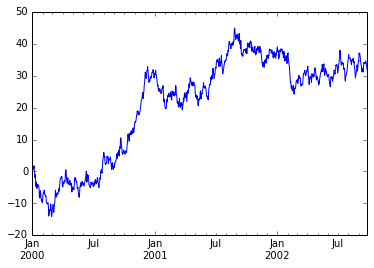

In [85]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()


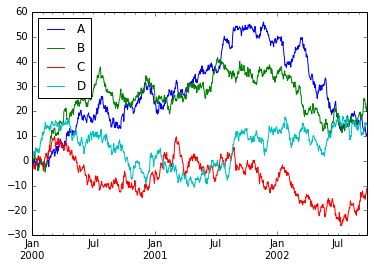

In [89]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])


df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')